# Visualizing Time Series

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings

warnings.filterwarnings('ignore')
sns.set()

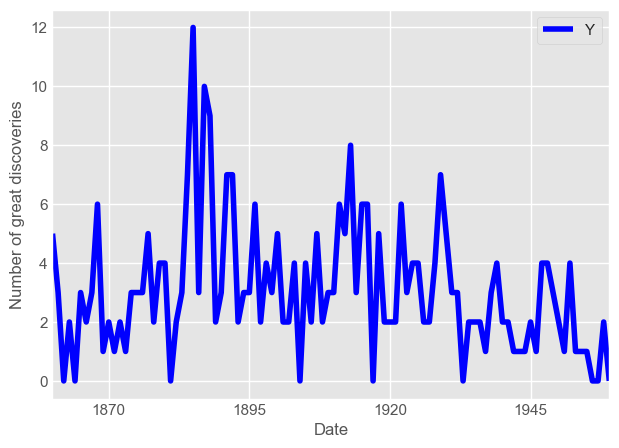

In [20]:
discoveries = pd.read_csv('../data/discoveries.csv')

discoveries['date'] = pd.to_datetime(discoveries['date'])

# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label inyour plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()


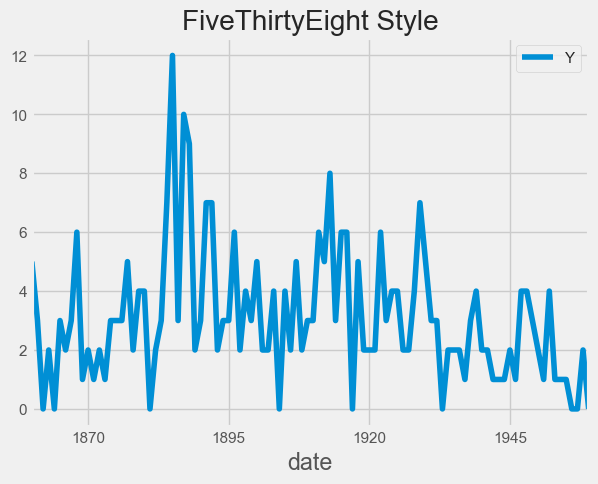

In [21]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

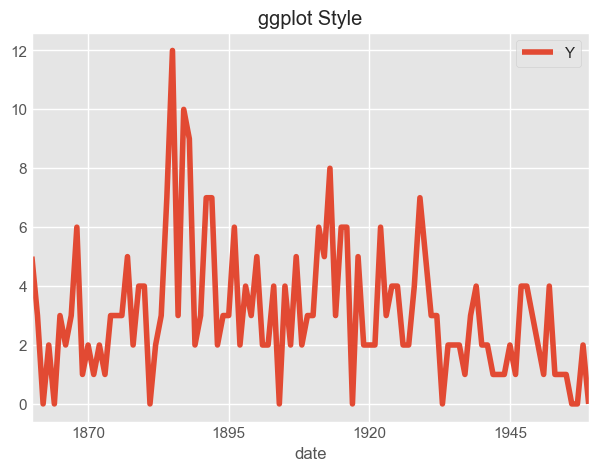

In [22]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

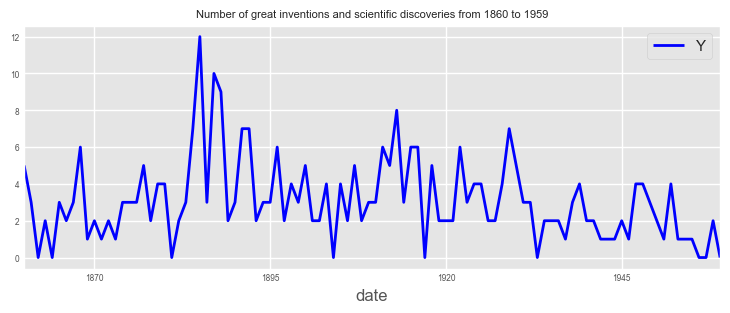

In [23]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

# Slicing time

In [24]:
discoveries

,Y
date,
1860-01-01,5
1861-01-01,3
1862-01-01,0
1863-01-01,2
1864-01-01,0
...,...
1955-01-01,1
1956-01-01,0
1957-01-01,0


In [25]:
discoveries['1900':'1920']

,Y
date,
1900-01-01,5
1901-01-01,2
1902-01-01,2
1903-01-01,4
1904-01-01,0
1905-01-01,4
1906-01-01,2
1907-01-01,5
1908-01-01,2


In [26]:
discoveries['1900-01':'1905-01']

,Y
date,
1900-01-01,5
1901-01-01,2
1902-01-01,2
1903-01-01,4
1904-01-01,0
1905-01-01,4


<Axes: xlabel='date'>

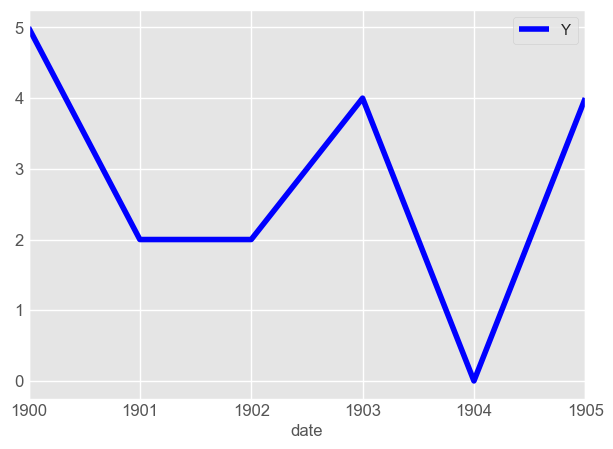

In [27]:
discoveries['1900-01':'1905-01'].plot(color='blue', fontsize=12)

# Markers 

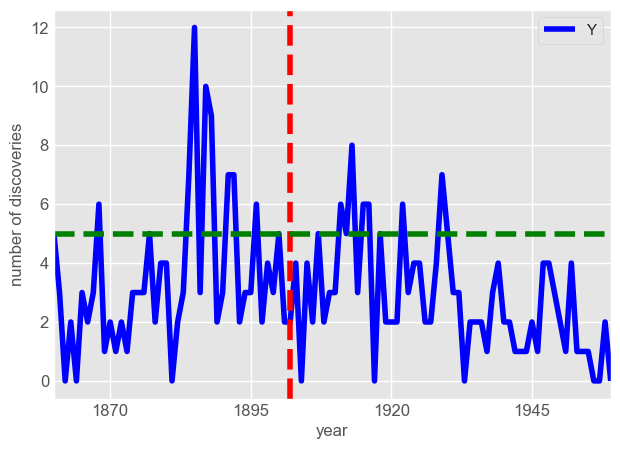

In [32]:
discoveries.asfreq('Y')
ax = discoveries.plot(color='blue', fontsize=12)
ax.axvline(x=(pd.Timestamp('1902-01-01')), color='red', linestyle='--')
ax.axhline(y=5, color='green', linestyle='--')
ax.set_xlabel('year')
ax.set_ylabel('number of discoveries')

plt.show()

In [ ]:
# Regions

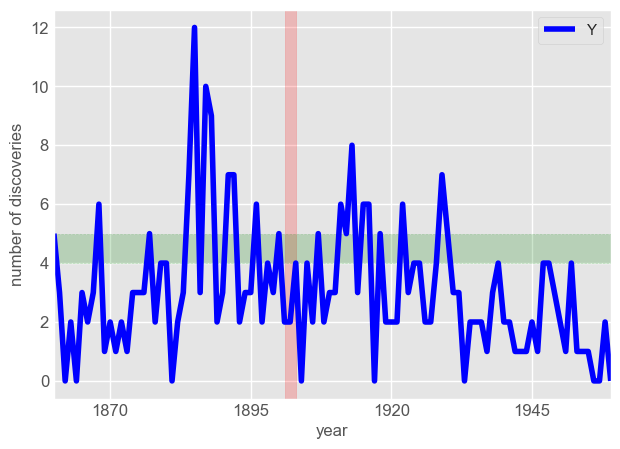

In [34]:
discoveries.asfreq('Y')
ax = discoveries.plot(color='blue', fontsize=12)

ax.axvspan(pd.Timestamp('1901-01-01'), pd.Timestamp('1903-01-01'), color='red', alpha=0.2)
ax.axhspan(4,5 , color='green', linestyle='--', alpha=0.2)

ax.set_xlabel('year')
ax.set_ylabel('number of discoveries')

plt.show()

# Cleaning time series

In [38]:
co2 = pd.read_csv('../data/ch2_co2_levels.csv', parse_dates=['datestamp'], index_col='datestamp')
co2

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


In [39]:
co2.isnull().sum()

co2    59
dtype: int64

In [40]:
co2.notnull().sum()

co2    2225
dtype: int64

We can fill empty values with the mean of the time series, the value before or after.

In [42]:
co2.fillna(method='ffill')
co2.fillna(method='bfill')
co2.fillna(value=co2.mean())

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


# Plot aggregates of your data
## Moving averages 

Used for: 
- smooth out short term fluctuations
- removing outliers
- highlighting long term trends or cycles



In [43]:
co2_mean = co2.rolling(window=52).mean()

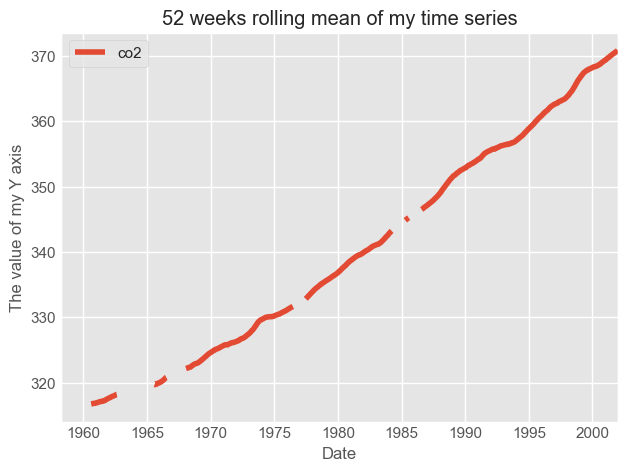

In [44]:
ax=co2_mean.plot()
ax.set_xlabel('Date')
ax.set_ylabel('The value of my Y axis')
ax.set_title('52 weeks rolling mean of my time series')

plt.show()

# Aggregating by month, week...


In [45]:
index_month =co2.index.month
index_month

Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
       ...
       10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
      dtype='int32', name='datestamp', length=2284)

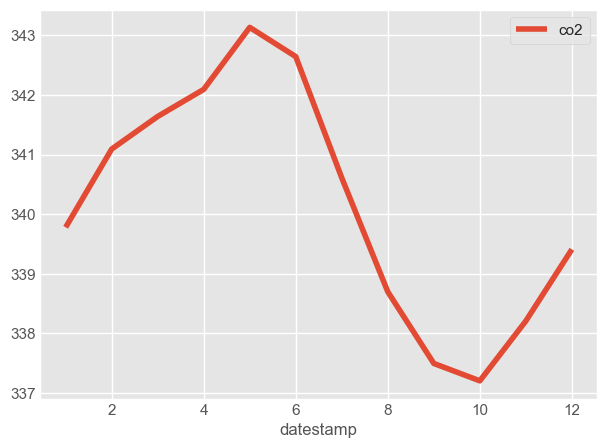

In [46]:
co2_by_month = co2.groupby(index_month).mean()
co2_by_month.plot() 
plt.show()

In [48]:
co2_levels = co2

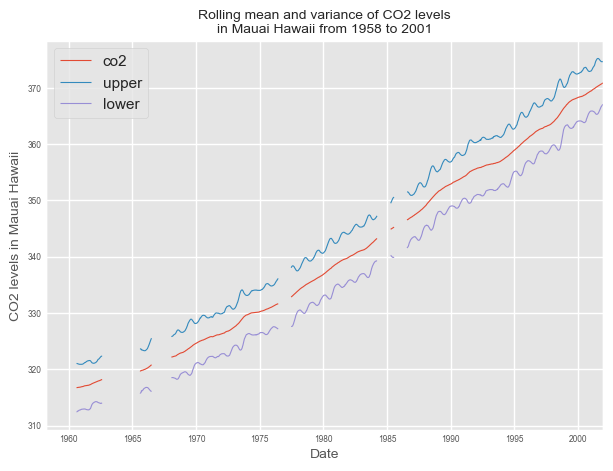

In [49]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

In [50]:
## Histograms 

## Boxplots 

## Kerne Density Plots

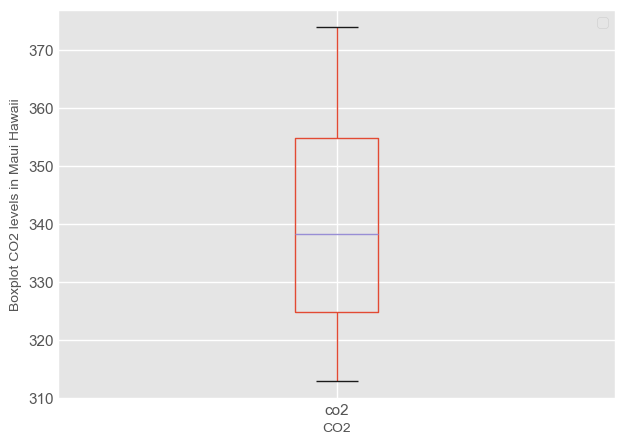

In [53]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

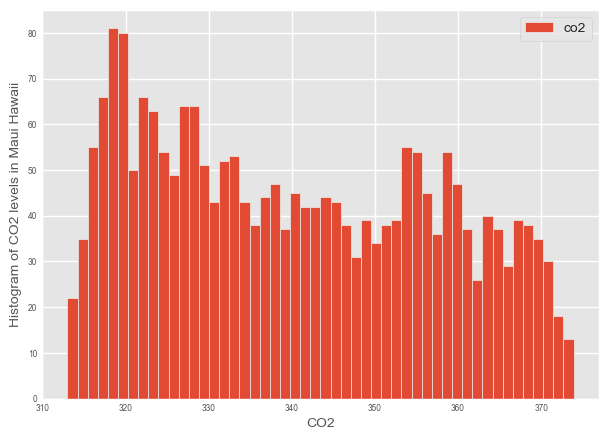

In [54]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

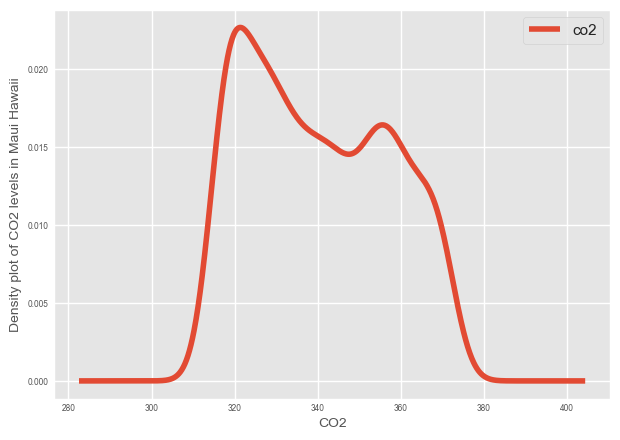

In [55]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()


# Autocorrelation and Partial Autocorrelation